In [1]:
#import necessary Library
import sys
import pandas as pd
import os
sys.path.append('../scripts')
import data_processing as dp

In [2]:
#load Dataset
df = pd.read_csv("../data/benin-malanville.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


1. Summary Statistics

Calculate the mean, median, standard deviation, and other statistical measures for each numeric column to understand the data distribution.

In [3]:
# Calculate summary statistics
dp.summary_statistics(df)


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


The output includes mean, median, standard deviation, min, max, and quartiles for each numeric column as shown in the above

2. Data Quality Check

 Look for missing values, outliers, or incorrect entries.

In [4]:
# Check for missing values
dp.check_missing_values(df)

Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

from the above we can see that all the column except Comments have free from Both Null and NAN values. However the Comments Attrbute have 525600 NAN values. Hence this column is not important for the analysis therefore we need to drop it to get better results.

In [5]:
# Drop unnecessary columns
df = dp.drop_columns(df, ['Comments'])
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


In [6]:
# Check for missing values
dp.check_missing_values(df)

Missing Values:
 Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

Now our data is free from missing and NaN values.

In [7]:
# Check for negative values
dp.check_negative_values(df)

Negative GHI Values:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev  

(               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
 0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
 1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
 2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
 3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
 4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
 ...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
 525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
 525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
 525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
 525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
 525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   
 
         WSstdev     WD  W

In [8]:
# Replace negative values
df = dp.replace_negative_values(df)
df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,0.0,0.0,0.0,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9
525596,2022-08-08 23:57,0.0,0.0,0.0,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9
525597,2022-08-08 23:58,0.0,0.0,0.0,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9
525598,2022-08-08 23:59,0.0,0.0,0.0,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9


In [9]:
# Check for outliers in sensor readings and wind speed
dp.check_outliers(df, ['ModA', 'ModB', 'WS', 'WSgust'])

Outliers:
                 ModA           ModB             WS         WSgust
count  525600.000000  525600.000000  525600.000000  525600.000000
mean      236.589496     228.883576       2.121113       2.809195
std       326.894859     316.536515       1.603466       2.029120
min         0.000000       0.000000       0.000000       0.000000
25%         0.000000       0.000000       1.000000       1.300000
50%         4.500000       4.300000       1.900000       2.600000
75%       463.700000     447.900000       3.100000       4.100000
max      1342.300000    1342.300000      19.500000      26.600000


,ModA,ModB,WS,WSgust
count,525600.000000,525600.000000,525600.000000,525600.000000
mean,236.589496,228.883576,2.121113,2.809195
std,326.894859,316.536515,1.603466,2.029120
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.300000
50%,4.500000,4.300000,1.900000,2.600000
75%,463.700000,447.900000,3.100000,4.100000
max,1342.300000,1342.300000,19.500000,26.600000


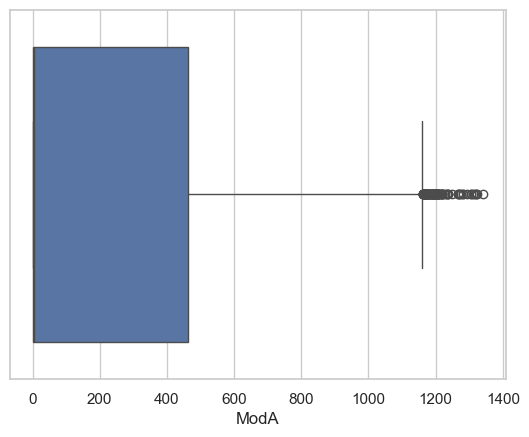

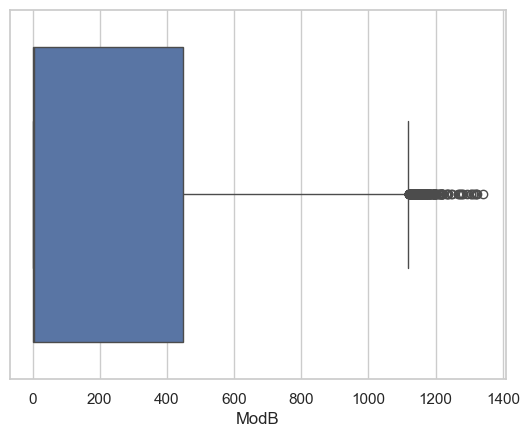

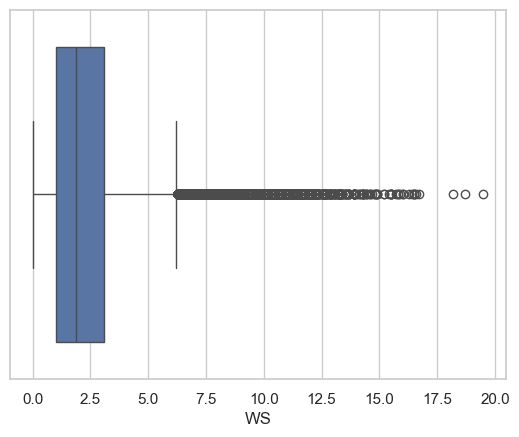

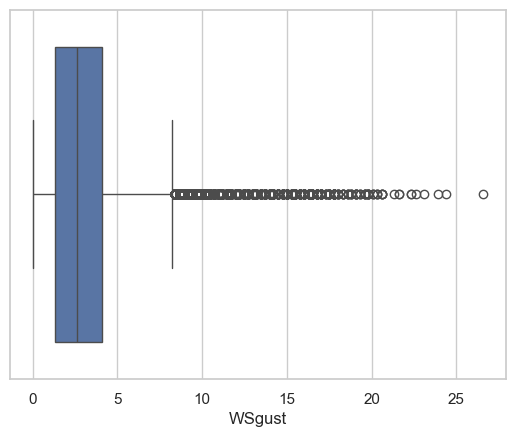

In [10]:
# Plot boxplots for selected columns
dp.plot_boxplot(df, 'ModA')
dp.plot_boxplot(df, 'ModB')
dp.plot_boxplot(df, 'WS')
dp.plot_boxplot(df, 'WSgust')

3. Time Series Analysis

Plot line graphs or area plots of GHI, DNI, DHI, and Tamb over time to observe patterns, trends, or anomalies.

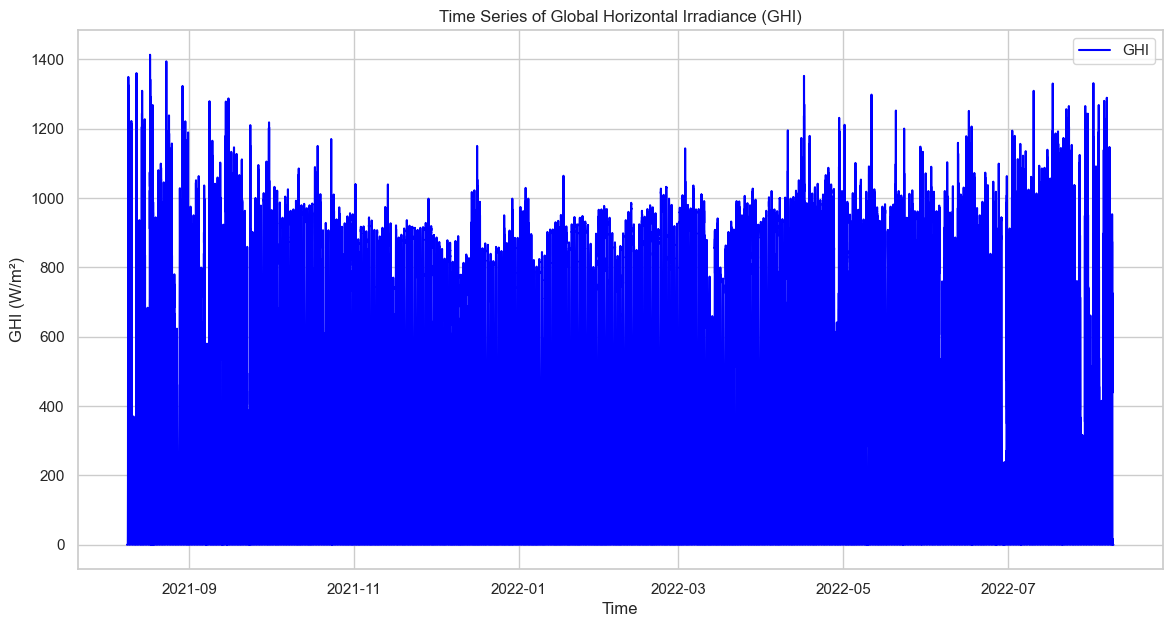

In [11]:
# Convert 'Timestamp' to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Plot time series of GHI
dp.plot_time_series_ghi(df)

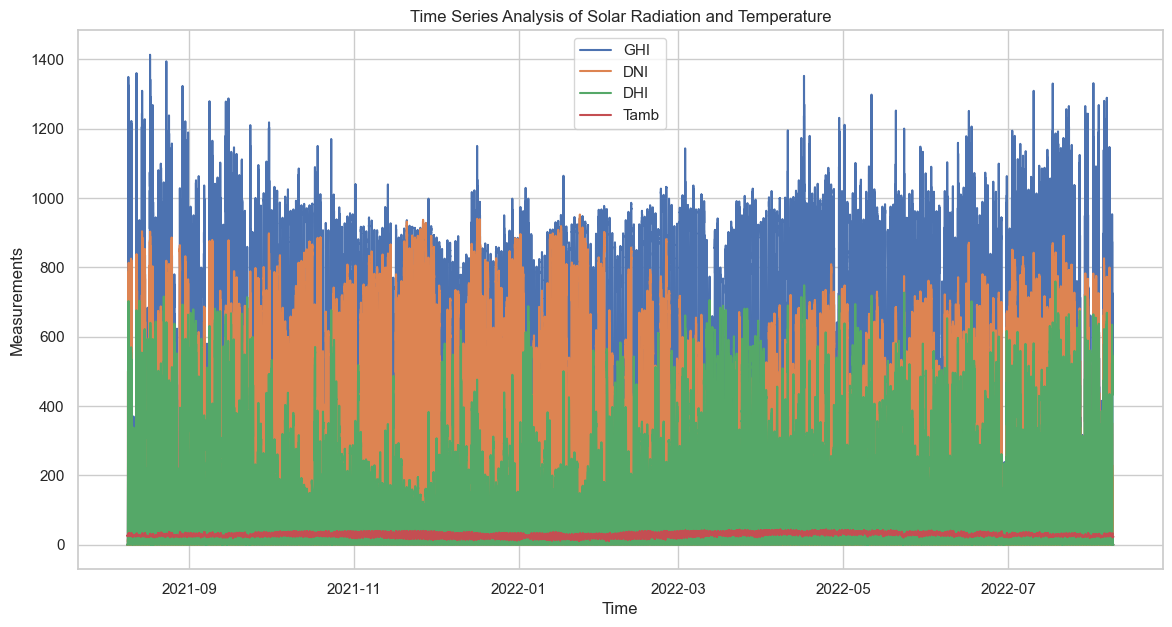

In [12]:
df.set_index('Timestamp', inplace=True)
# Plot time series data for multiple columns
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']
dp.plot_time_series_multiple(df, columns_to_plot)

4. Evaluate the Impact of Cleaning on Sensor Readings

Analyze the effect of cleaning events on sensor readings (ModA, ModB).

Impact of Cleaning on Sensor Readings:
                 ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


<Figure size 1400x700 with 0 Axes>

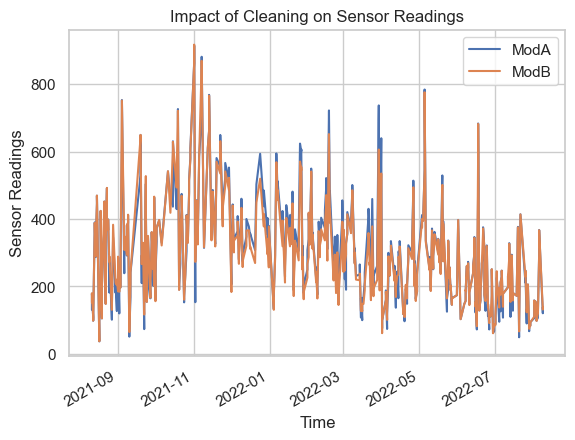

In [13]:
# Group by 'Cleaning' and calculate mean for 'ModA' and 'ModB'
dp.calculate_cleaning_effect(df)

# Plot the impact of cleaning on sensor readings
dp.plot_cleaning_impact(df)

5. Correlation Analysis
Use heatmaps or pair plots to visualize correlations between solar radiation components and temperature measures.

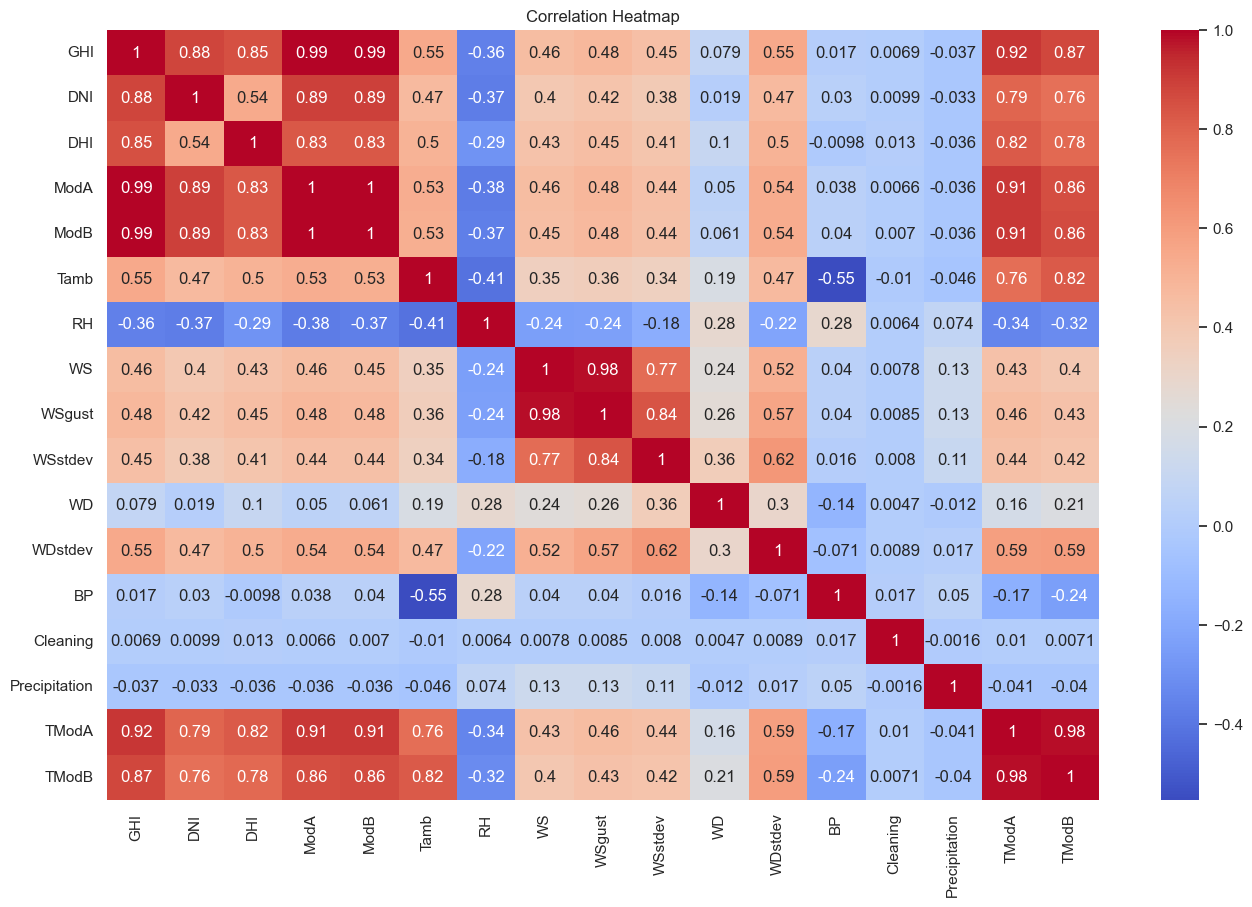

In [14]:
#Correlation Matrix and Heatmap: Calculate and visualize correlations using a heatmap.
dp.plot_correlation_matrix(df)

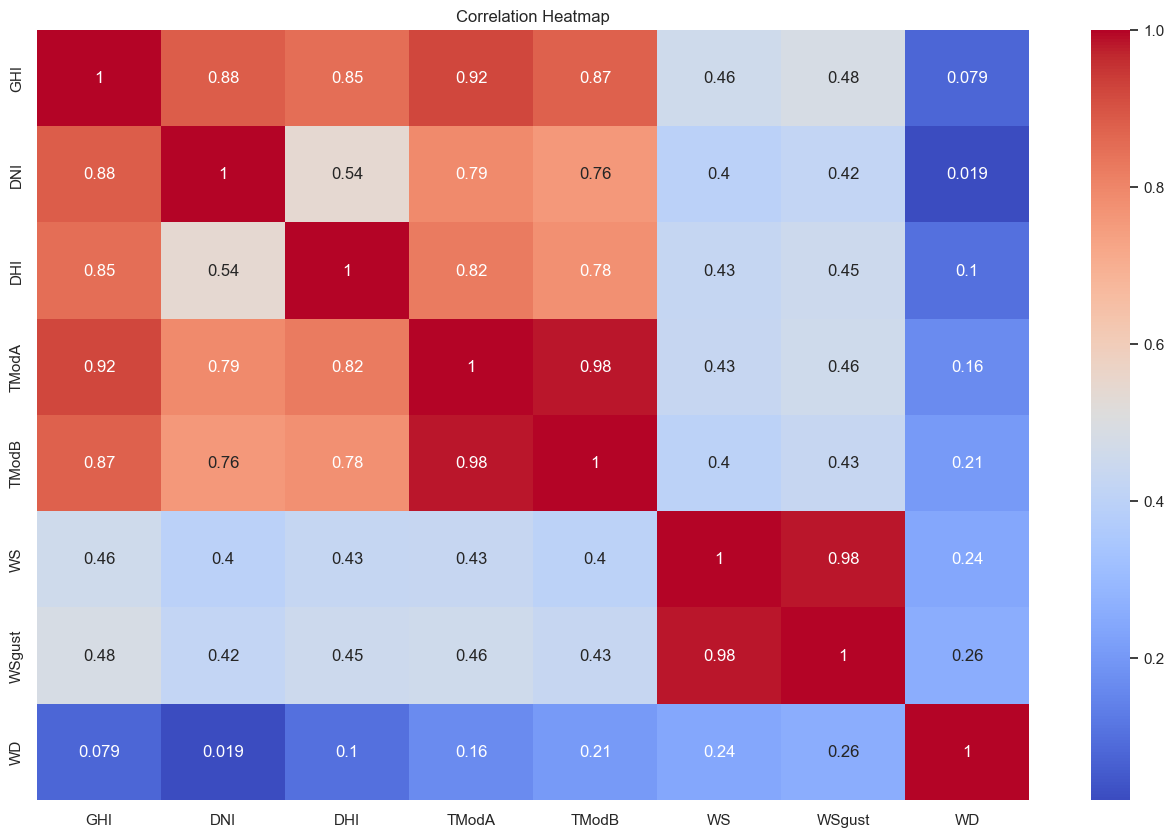

In [15]:
# Plot correlation heatmap for selected data
dp.plot_correlation_heatmap(df, ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD'])

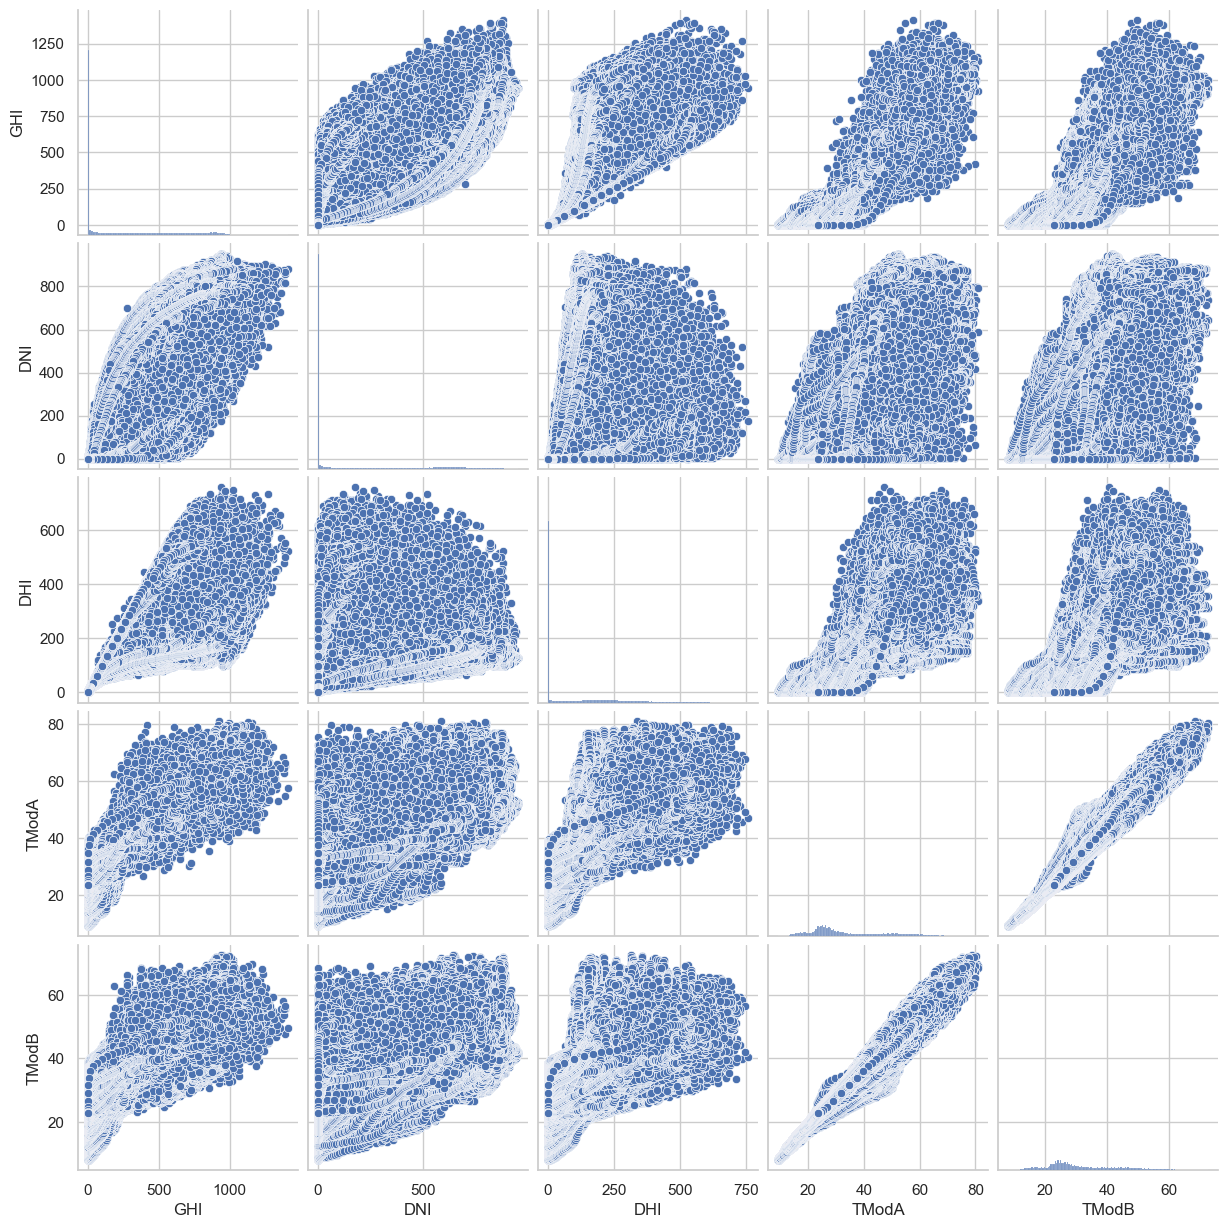

In [16]:
#Pair Plot: Use pair plots to visualize relationships between solar radiation components and temperature measures.
dp.plot_pairplot(df, ['GHI', 'DNI', 'DHI', 'TModA', 'TModB'])


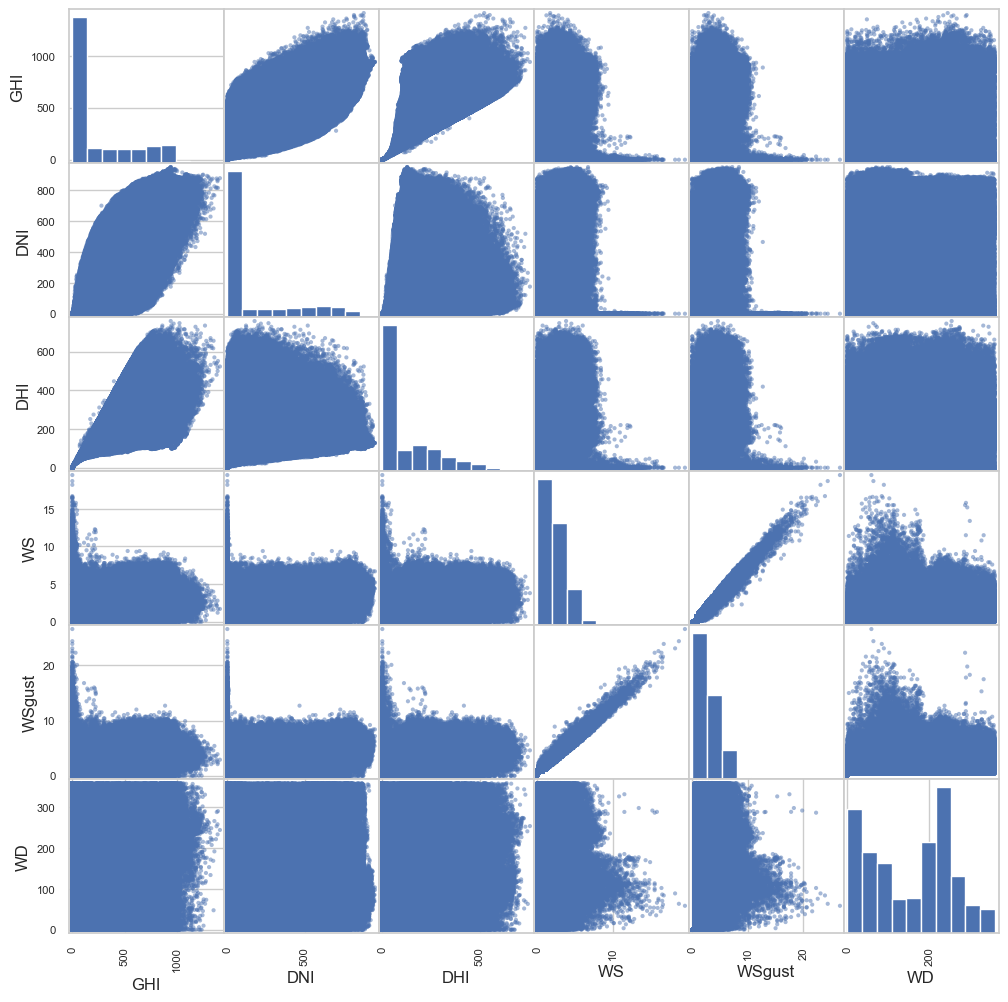

In [17]:
#Scatter Matrix: Investigate relationships between wind conditions and solar irradiance
dp.plot_scatter_matrix(df, ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD'])


6. Wind Analysis
Use polar plots to identify trends and significant wind events.

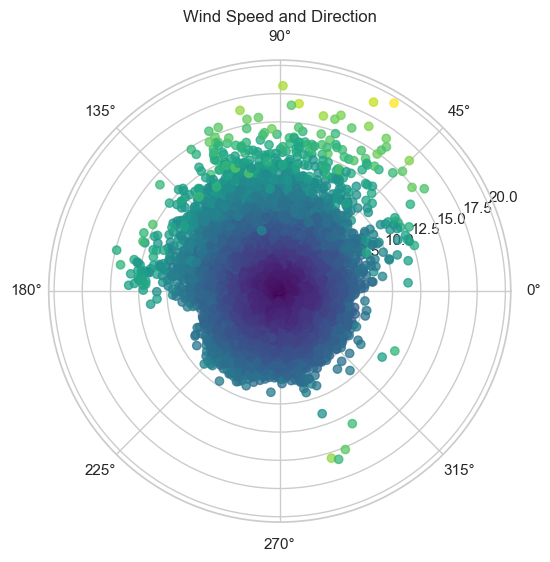

In [18]:
# Polar plot for wind analysis
dp.plot_polar_wind_analysis(df)

7. Temperature Analysis

Examine how relative humidity (RH) might influence temperature readings and solar radiation.

In [19]:
# Plot temperature vs. relative humidity
dp.plot_temperature_vs_humidity(df)

8. Histograms

Create histograms for variables like GHI, DNI, DHI, WS, and temperatures to visualize the frequency distribution.

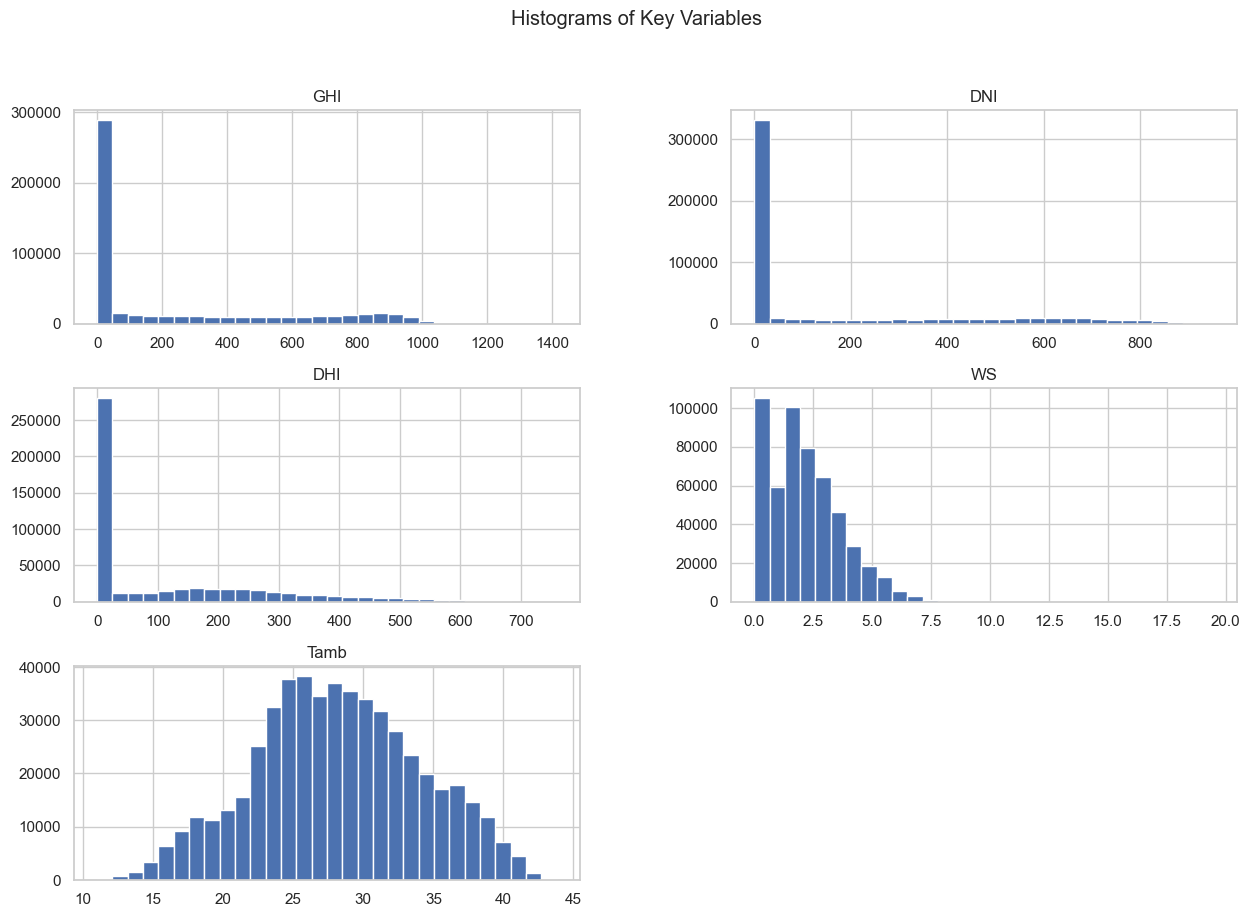

In [ ]:
# Plot histograms
dp.plot_histograms(df, ['GHI', 'DNI', 'DHI', 'WS', 'Tamb'])

9. Z-Score Analysis

Calculate Z-scores to flag data points that are significantly different from the mean.

In [ ]:
# Calculate Z-scores for GHI, DNI, DHI
df = dp.calculate_zscores(df)
df.head()

GHI Outliers:
                         GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   
2021-08-09 11:17:00  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0  2.7   
2021-08-09 14:10:00  1253.0  714.8  552.5  1156.0  1155.0  31.0  64.2  3.3   
2021-08-09 14:11:00  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9  2.2   
...                     ...    ...    ...     ...     ...   ...   ...  ...   
2022-08-03 13:38:00  1268.0  652.5  612.1  1163.0  1150.0  30.1  70.7  2.7   
2022-08-05 13:40:00  1280.0  778.5  497.2  1168.0  1161.0  29.0  70.3  3.8   
2022-08-05 14:17:00  1244.0  745.2  530.4  1126.0  1118.0  30.8  64.3  3.0   
2022-08-06 13:15:00  1262.0  772.4  475.8  1166.0  1153.0  31.1  66.0  3.4   
2022-08-06 13:16:00  1289.0  758.1  519.2  1191.0

10. Bubble Charts

Explore complex relationships between variables using bubble charts.

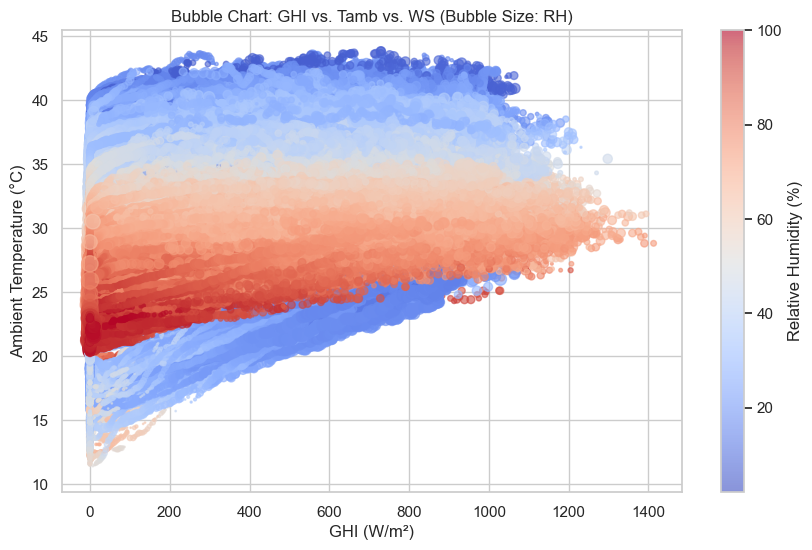

In [ ]:
# Plot bubble chart
dp.plot_bubble_chart(df)

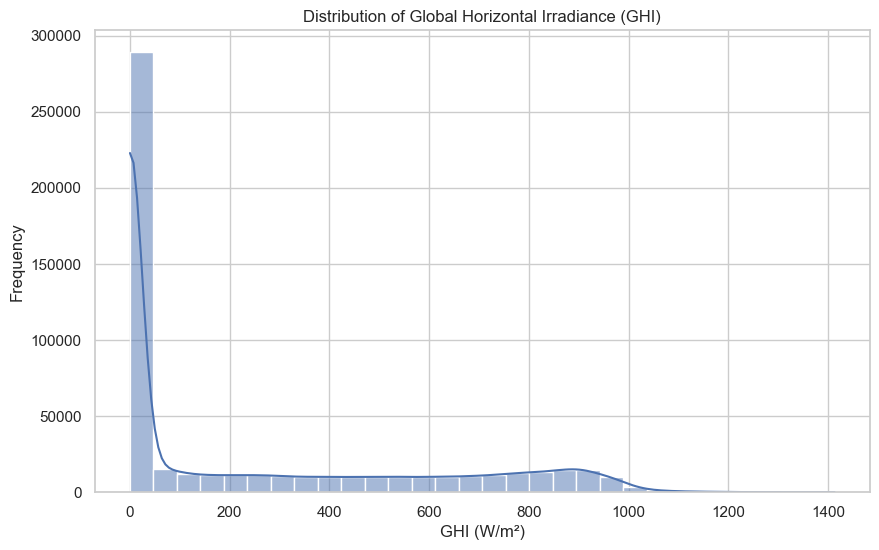

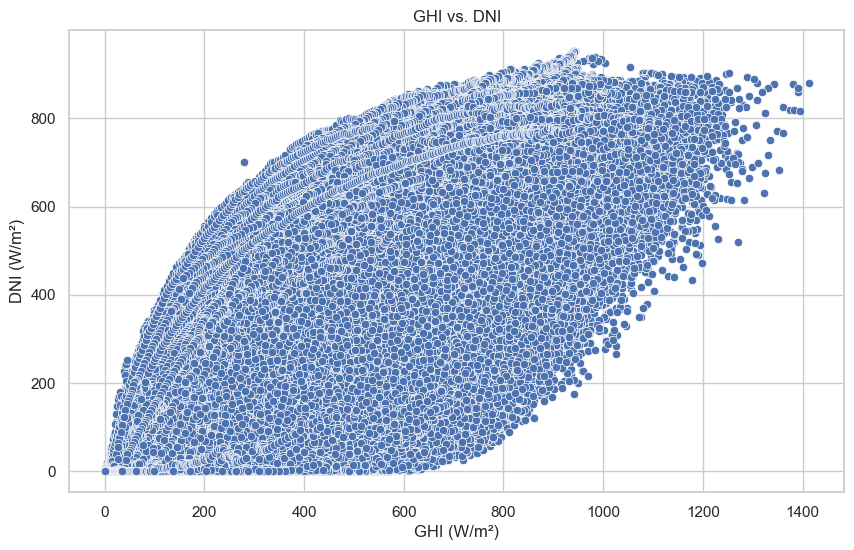

In [ ]:
# Plotting the distribution of Global Horizontal Irradiance (GHI)
dp.plot_ghi_distribution(df)

# Plotting the relationship between GHI and DNI
dp.plot_ghi_vs_dni(df)